In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

In [94]:
data = pd.read_csv("C:/Users/kimbj/OneDrive/바탕 화면/김범진/가천 2학년 1학기/인공지능프로그래밍/mushrooms.csv")

In [95]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [97]:
X=data.drop('class',axis=1)
y = data['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [99]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [100]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.optimizers import SGD,Adam
model = Sequential()
model.add(Dense(10,input_shape=(21,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(2,activation='softmax'))
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])
model.summary()

ValueError: Could not interpret optimizer identifier: <keras.optimizers.Adam object at 0x000001BD5C1CAB20>

In [101]:
N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [43]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5121


[nan, 0.5120630264282227]

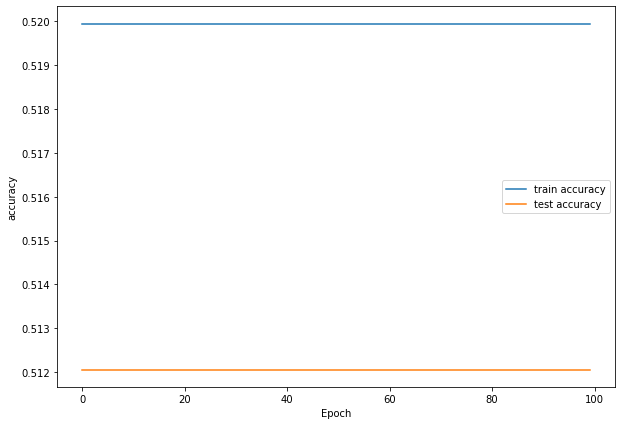

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['accuracy'], label='train accuracy')
plt.plot(range(N_EPOCHS), history.history['val_accuracy'], label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [53]:
y_pred = model.predict(X_test)

y_test_class = y_test.tolist()
y_pred_class = np.argmax(y_pred,axis=1)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1040
           1       0.00      0.00      0.00       991

    accuracy                           0.51      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.26      0.51      0.35      2031

[[1040    0]
 [ 991    0]]


C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kimbj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (21,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                1408      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 66        
Total params: 3,554
Trainable params: 3,554
Non-trainable params: 0
_________________________________________________________________


In [78]:
N_EPOCHS = 10
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 2/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 3/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 4/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 5/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 6/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 7/10
191/191 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.5199 - val_loss: nan - val_accuracy: 0.5121
Epoch 8/10
191/191 [============================

In [79]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5121


[nan, 0.5120630264282227]